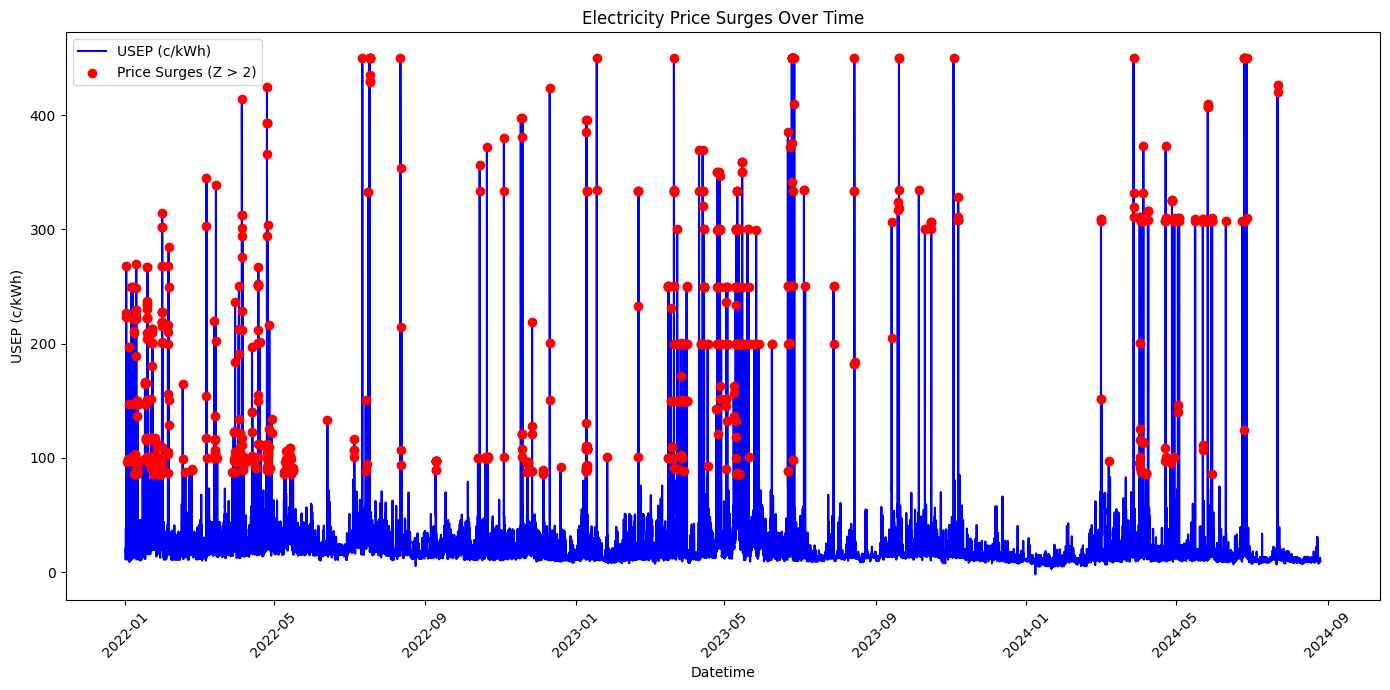

In [ ]:
import pandas as pd

# Load all the provided CSV files
file_paths = [
    '2022c.csv',
    '2023c.csv',
    '2024c.csv'
]

# Load each file into a dataframe
dataframes = [pd.read_csv(file_path) for file_path in file_paths]

# Combine all data into one dataframe
combined_data = pd.concat(dataframes)

# Convert the 'Datetime' column to datetime format
combined_data['Datetime'] = pd.to_datetime(combined_data['Datetime'])

# Sort the data by Datetime
combined_data.sort_values('Datetime', inplace=True)

# Calculate a 7-day (336 half-hourly intervals) moving average
combined_data['Moving_Avg'] = combined_data['USEP (c/kWh)'].rolling(window=336).mean()

# Calculate z-scores to detect price surges
combined_data['Z_Score'] = (combined_data['USEP (c/kWh)'] - combined_data['USEP (c/kWh)'].mean()) / combined_data['USEP (c/kWh)'].std()

# Filter the data for periods where the Z-Score exceeds 2 (considered as a surge)
price_surges = combined_data[combined_data['Z_Score'] > 2]

import matplotlib.pyplot as plt

# Plot the full dataset with the price surges highlighted
plt.figure(figsize=(14, 7))

# Plot the USEP prices over time
plt.plot(combined_data['Datetime'], combined_data['USEP (c/kWh)'], label='USEP (c/kWh)', color='blue')

# Highlight the price surges
plt.scatter(price_surges['Datetime'], price_surges['USEP (c/kWh)'], color='red', label='Price Surges (Z > 2)', zorder=5)

# Adding titles and labels
plt.title('Electricity Price Surges Over Time')
plt.xlabel('Datetime')
plt.ylabel('USEP (c/kWh)')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-15-616b038b7f98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_surges['Hour'] = price_surges['Datetime'].dt.hour
<ipython-input-15-616b038b7f98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_surges['Day_of_Week'] = price_surges['Datetime'].dt.day_name()
<ipython-input-15-616b038b7f98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

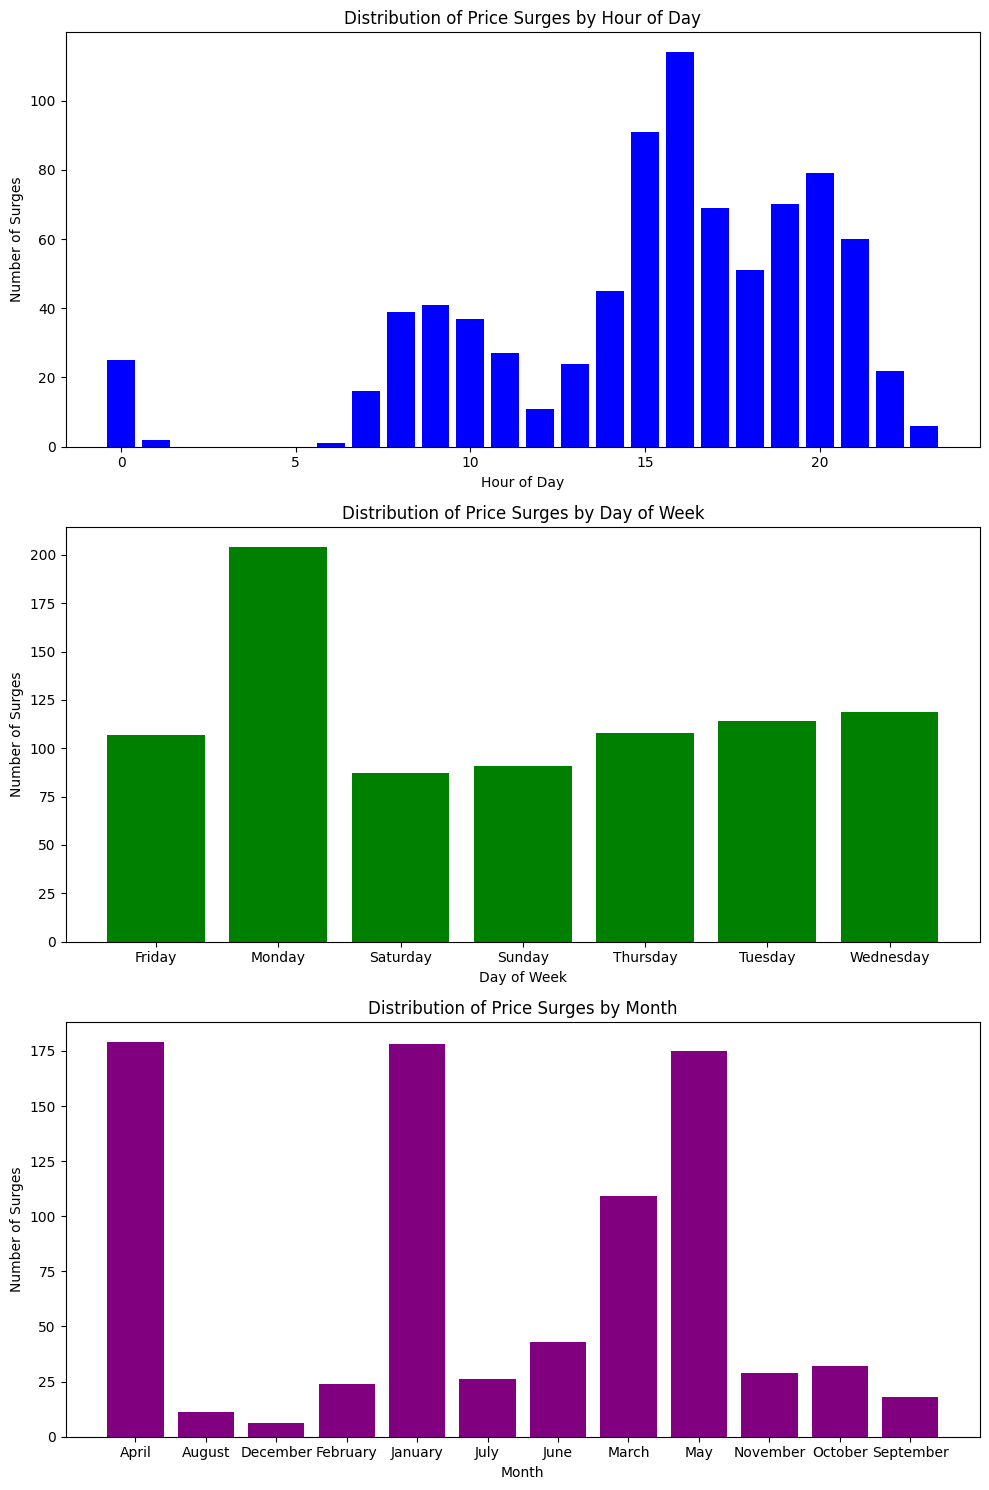

In [ ]:
# Extract additional time features for the price surges
price_surges['Hour'] = price_surges['Datetime'].dt.hour
price_surges['Day_of_Week'] = price_surges['Datetime'].dt.day_name()
price_surges['Month'] = price_surges['Datetime'].dt.month_name()

# Group by these features to study the distribution
surges_by_hour = price_surges.groupby('Hour').size()
surges_by_day = price_surges.groupby('Day_of_Week').size()
surges_by_month = price_surges.groupby('Month').size()

# Plot the distribution of price surges by hour, day of the week, and month
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot by hour
axs[0].bar(surges_by_hour.index, surges_by_hour.values, color='blue')
axs[0].set_title('Distribution of Price Surges by Hour of Day')
axs[0].set_xlabel('Hour of Day')
axs[0].set_ylabel('Number of Surges')

# Plot by day of the week
axs[1].bar(surges_by_day.index, surges_by_day.values, color='green')
axs[1].set_title('Distribution of Price Surges by Day of Week')
axs[1].set_xlabel('Day of Week')
axs[1].set_ylabel('Number of Surges')

# Plot by month
axs[2].bar(surges_by_month.index, surges_by_month.values, color='purple')
axs[2].set_title('Distribution of Price Surges by Month')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Number of Surges')

plt.tight_layout()
plt.show()


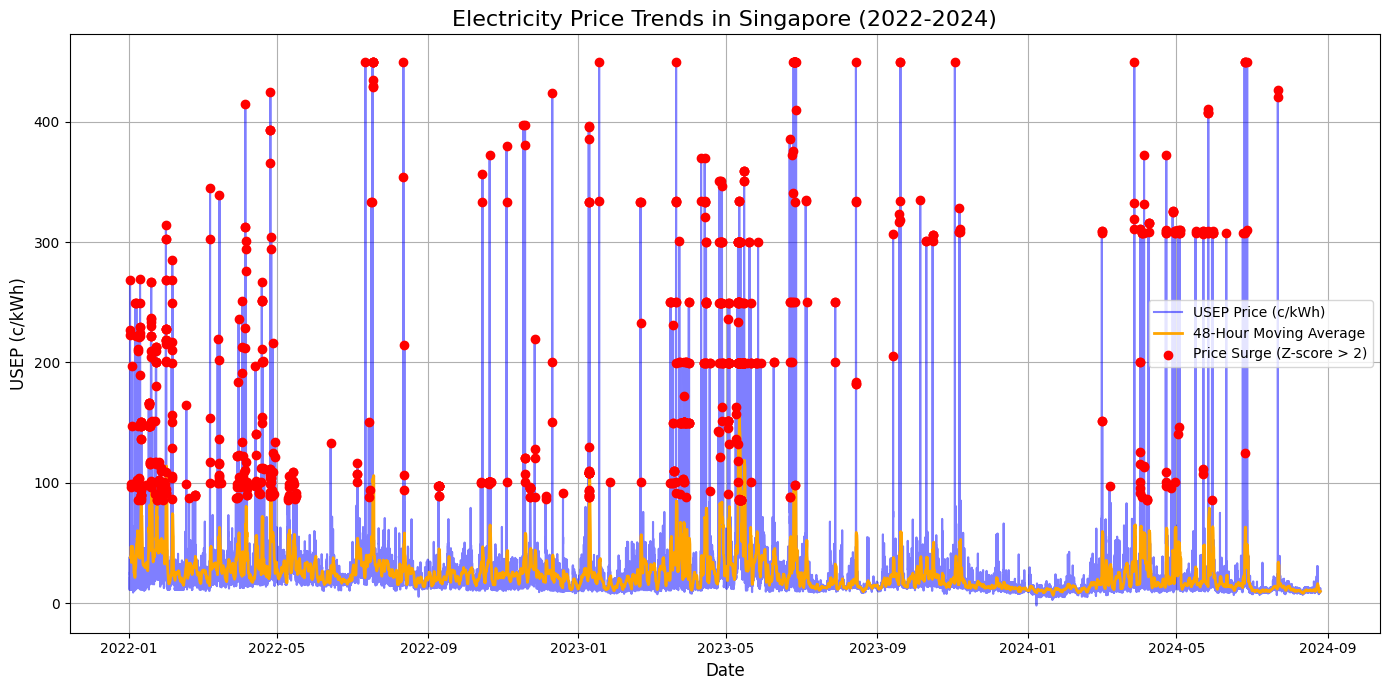

In [2]:
import pandas as pd

# Load the provided datasets
data_2022 = pd.read_csv('2022c.csv')
data_2023 = pd.read_csv('2023c.csv')
data_2024 = pd.read_csv('2024c.csv')

# Convert Datetime column to datetime format for all datasets
data_2022['Datetime'] = pd.to_datetime(data_2022['Datetime'])
data_2023['Datetime'] = pd.to_datetime(data_2023['Datetime'])
data_2024['Datetime'] = pd.to_datetime(data_2024['Datetime'])

# Concatenate data from all years for unified analysis
all_data = pd.concat([data_2022, data_2023, data_2024])

# Calculate moving average (window of 48, equivalent to 24 hours for half-hourly data)
all_data['Moving_Avg_48'] = all_data['USEP (c/kWh)'].rolling(window=48).mean()

# Calculate the z-score for the electricity price
all_data['z_score'] = (all_data['USEP (c/kWh)'] - all_data['USEP (c/kWh)'].mean()) / all_data['USEP (c/kWh)'].std()

import matplotlib.pyplot as plt

# Plot the original electricity price data along with the moving average
plt.figure(figsize=(14, 7))

# Plot the raw USEP prices
plt.plot(all_data['Datetime'], all_data['USEP (c/kWh)'], label='USEP Price (c/kWh)', alpha=0.5, color='blue')

# Plot the moving average (48-hour window)
plt.plot(all_data['Datetime'], all_data['Moving_Avg_48'], label='48-Hour Moving Average', color='orange', linewidth=2)

# Highlight periods of price surges based on high z-scores
high_z_score = all_data['z_score'] > 2
plt.scatter(all_data['Datetime'][high_z_score], all_data['USEP (c/kWh)'][high_z_score], color='red', label='Price Surge (Z-score > 2)', zorder=5)

# Labels and title
plt.title('Electricity Price Trends in Singapore (2022-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('USEP (c/kWh)', fontsize=12)
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


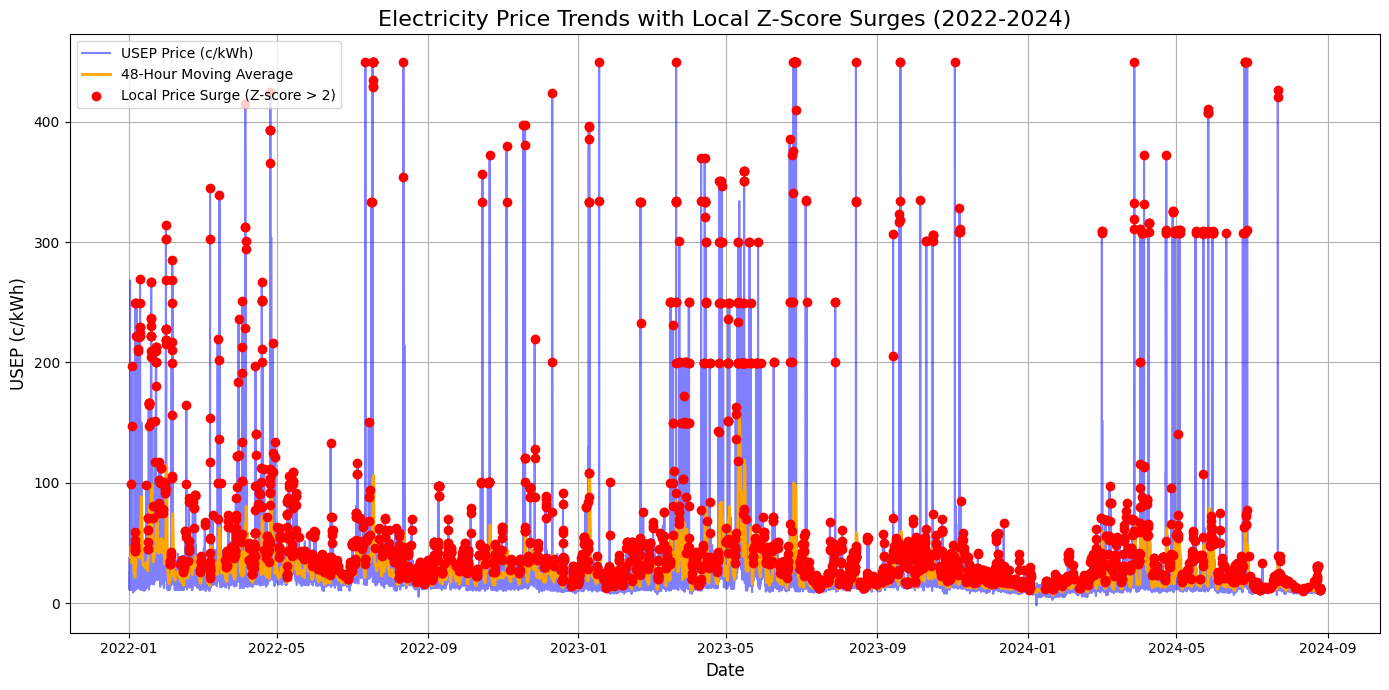

In [3]:
# Calculate the rolling standard deviation over a 48-hour window
all_data['Rolling_Std_48'] = all_data['USEP (c/kWh)'].rolling(window=48).std()

# Recalculate the z-score based on the moving average and the rolling standard deviation
all_data['z_score_moving_avg'] = (all_data['USEP (c/kWh)'] - all_data['Moving_Avg_48']) / all_data['Rolling_Std_48']

# Plot the original electricity price data along with the moving average and local z-score surges
plt.figure(figsize=(14, 7))

# Plot the raw USEP prices
plt.plot(all_data['Datetime'], all_data['USEP (c/kWh)'], label='USEP Price (c/kWh)', alpha=0.5, color='blue')

# Plot the moving average (48-hour window)
plt.plot(all_data['Datetime'], all_data['Moving_Avg_48'], label='48-Hour Moving Average', color='orange', linewidth=2)

# Highlight periods of price surges based on local z-scores greater than 2
local_z_score_surge = all_data['z_score_moving_avg'] > 2
plt.scatter(all_data['Datetime'][local_z_score_surge], all_data['USEP (c/kWh)'][local_z_score_surge], color='red', label='Local Price Surge (Z-score > 2)', zorder=5)

# Labels and title
plt.title('Electricity Price Trends with Local Z-Score Surges (2022-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('USEP (c/kWh)', fontsize=12)
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


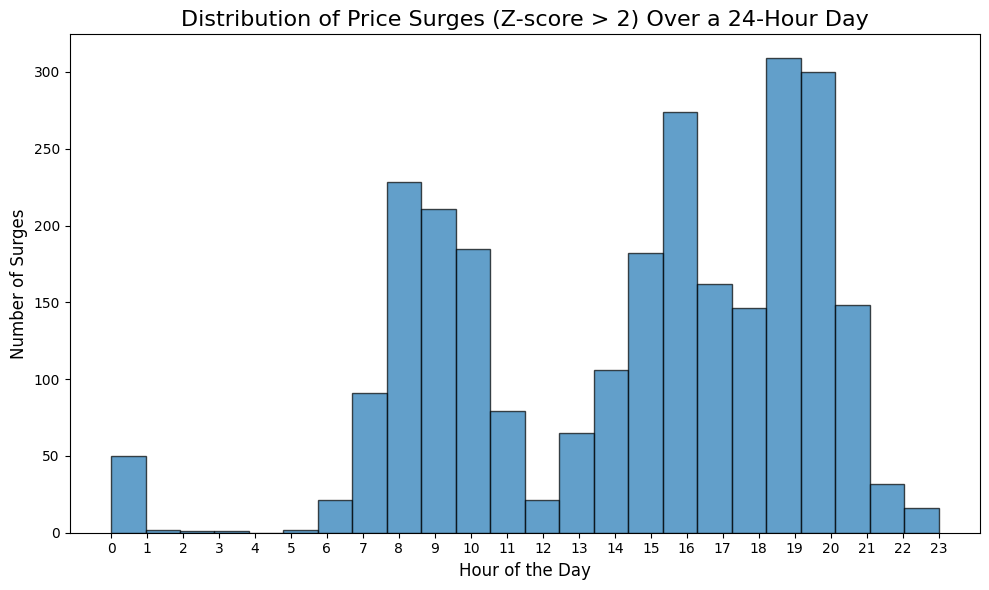

KeyError: 'Time_Period'

In [4]:
# Extract the hour from the Datetime column for analysis
all_data['Hour'] = all_data['Datetime'].dt.hour

# Filter data where local z-score surges occurred (z_score_moving_avg > 2)
surge_hours = all_data[local_z_score_surge]['Hour']

# Plot the distribution of surges over a 24-hour day
plt.figure(figsize=(10, 6))
plt.hist(surge_hours, bins=24, edgecolor='black', alpha=0.7)

# Labels and title
plt.title('Distribution of Price Surges (Z-score > 2) Over a 24-Hour Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Surges', fontsize=12)
plt.xticks(range(24))

# Display the plot
plt.tight_layout()
plt.show()

# Create a period column that tracks each 30-minute interval in the day (e.g., 00:00-00:30, 00:30-01:00, etc.)
all_data['Time_Period'] = all_data['Datetime'].dt.strftime('%H:%M')

# Group the surge data by the 30-minute period and count the number of surges in each period
time_period_surge_counts = all_data['z_score_moving_avg'].groupby('Time_Period').size()

# Plot the surge counts for each 30-minute period across the day
plt.figure(figsize=(14, 6))
plt.bar(time_period_surge_counts.index, time_period_surge_counts.values, edgecolor='black', alpha=0.7)

# Labels and title
plt.title('Distribution of Price Surges by Each 30-Minute Period (24-Hour Day)', fontsize=16)
plt.xlabel('30-Minute Periods', fontsize=12)
plt.ylabel('Number of Surges', fontsize=12)
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


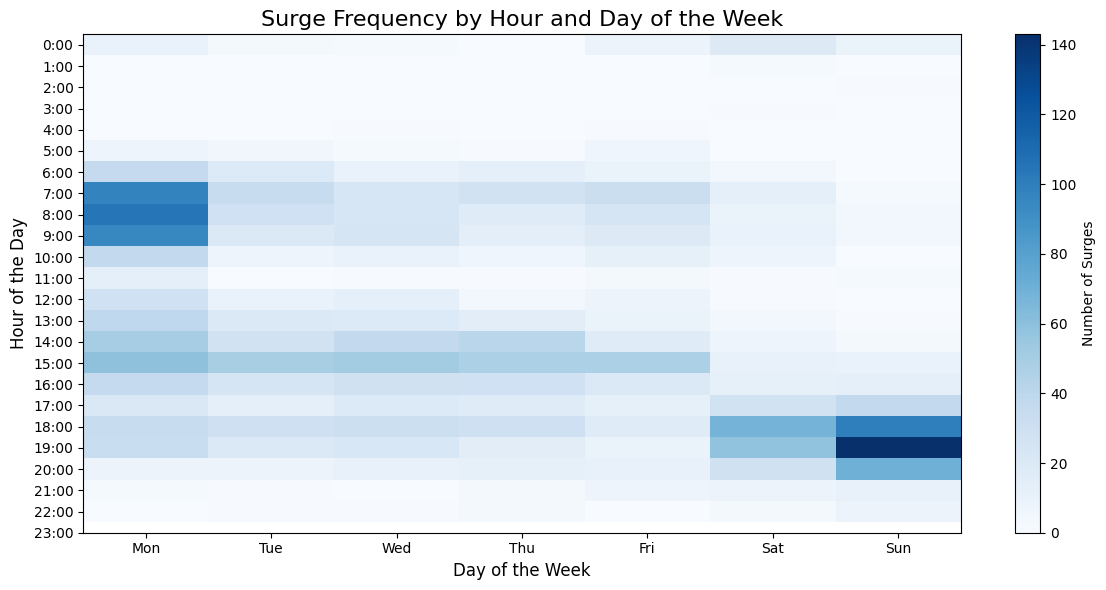

In [ ]:
# Extract day of the week for analysis (Monday = 0, Sunday = 6)
all_data['Day_of_Week'] = all_data['Datetime'].dt.dayofweek

# Group by both the hour of the day and the day of the week to analyze surge patterns
surge_data = all_data[local_z_score_surge].groupby(['Hour', 'Day_of_Week']).size().unstack(fill_value=0)

# Plot heatmap of surge frequency by hour and day of the week
plt.figure(figsize=(12, 6))
plt.imshow(surge_data, aspect='auto', cmap='Blues')

# Adding labels
plt.colorbar(label='Number of Surges')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.yticks(ticks=range(24), labels=[f'{hour}:00' for hour in range(24)])
plt.title('Surge Frequency by Hour and Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Hour of the Day', fontsize=12)

# Display the heatmap
plt.tight_layout()
plt.show()


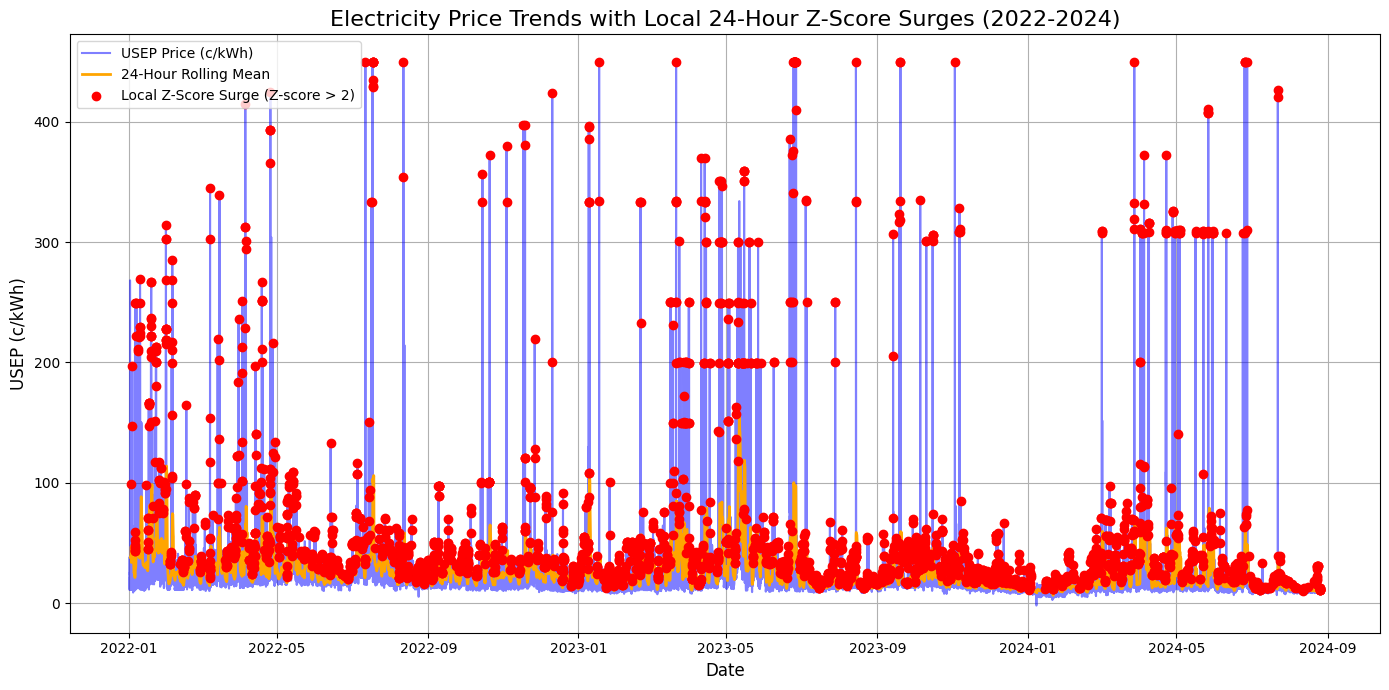

In [ ]:
# Calculate the 24-hour (48-point) rolling mean and rolling standard deviation
all_data['Rolling_Mean_48'] = all_data['USEP (c/kWh)'].rolling(window=48).mean()
all_data['Rolling_Std_48'] = all_data['USEP (c/kWh)'].rolling(window=48).std()

# Recalculate the z-score using the 24-hour rolling mean and standard deviation
all_data['local_z_score_24h'] = (all_data['USEP (c/kWh)'] - all_data['Rolling_Mean_48']) / all_data['Rolling_Std_48']

import matplotlib.pyplot as plt

# Plot the original electricity price data along with the moving average and local z-score surges based on 24-hour local mean
plt.figure(figsize=(14, 7))

# Plot the raw USEP prices
plt.plot(all_data['Datetime'], all_data['USEP (c/kWh)'], label='USEP Price (c/kWh)', alpha=0.5, color='blue')

# Plot the 24-hour rolling mean (48-point window)
plt.plot(all_data['Datetime'], all_data['Rolling_Mean_48'], label='24-Hour Rolling Mean', color='orange', linewidth=2)

# Highlight periods of price surges based on local z-scores greater than 2 (from the 24-hour rolling mean)
local_z_score_24h_surge = all_data['local_z_score_24h'] > 2
plt.scatter(all_data['Datetime'][local_z_score_24h_surge], all_data['USEP (c/kWh)'][local_z_score_24h_surge], color='red', label='Local Z-Score Surge (Z-score > 2)', zorder=5)

# Labels and title
plt.title('Electricity Price Trends with Local 24-Hour Z-Score Surges (2022-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('USEP (c/kWh)', fontsize=12)
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()



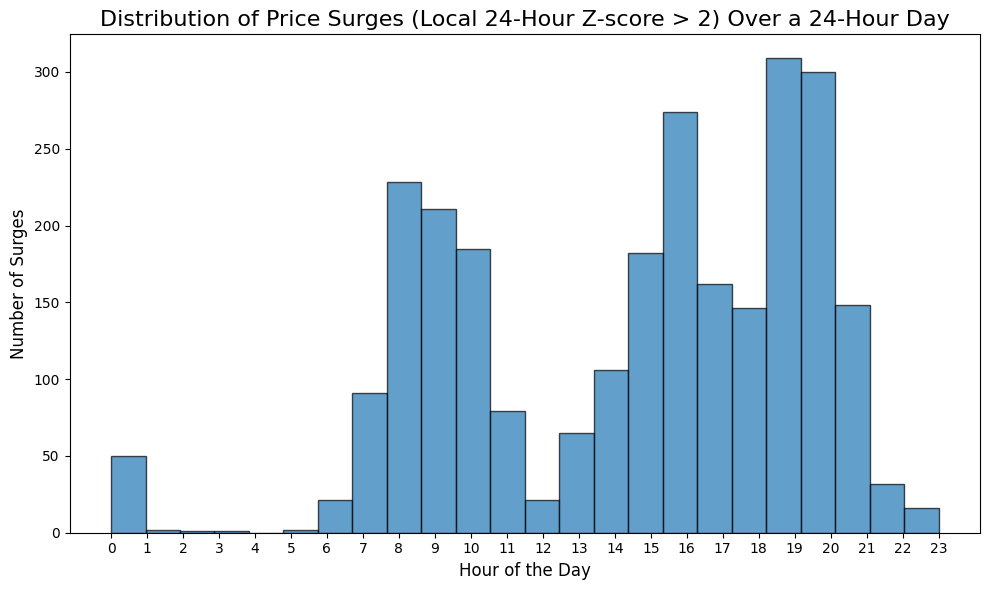

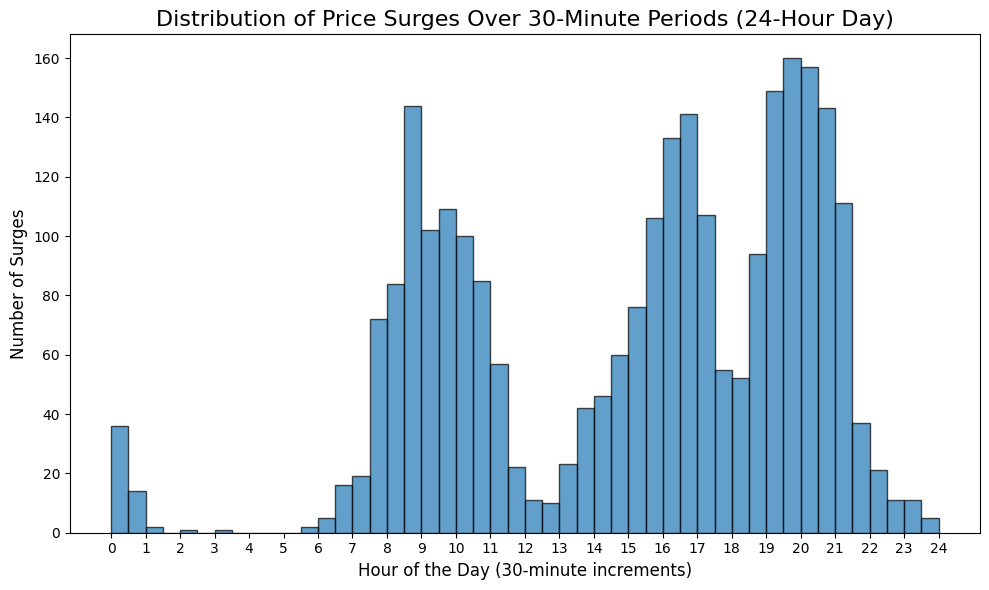

In [ ]:
# Extract the hour from the Datetime column for analysis
all_data['Hour'] = all_data['Datetime'].dt.hour

# Filter data where local z-score surges occurred based on the 24-hour rolling mean (local_z_score_24h > 2)
surge_hours_24h = all_data[local_z_score_24h_surge]['Hour']

# Plot the distribution of surges over a 24-hour day
plt.figure(figsize=(10, 6))
plt.hist(surge_hours_24h, bins=24, edgecolor='black', alpha=0.7)

# Labels and title
plt.title('Distribution of Price Surges (Local 24-Hour Z-score > 2) Over a 24-Hour Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Surges', fontsize=12)
plt.xticks(range(24))

# Display the plot
plt.tight_layout()
plt.show()

# Plot the distribution of surges over 30-minute periods across the day
plt.figure(figsize=(10, 6))

# Create bins for every 30 minutes (48 bins for a 24-hour period)
bin_edges = [i / 2 for i in range(49)]  # 0, 0.5, 1, 1.5, ..., 24

# Extract the time in hours with fractions for half-hours (e.g., 0.5, 1.0, 1.5, etc.)
time_in_hours = all_data[local_z_score_24h_surge]['Datetime'].dt.hour + all_data[local_z_score_24h_surge]['Datetime'].dt.minute / 60

# Plot the histogram
plt.hist(time_in_hours, bins=bin_edges, edgecolor='black', alpha=0.7)

# Labels and title
plt.title('Distribution of Price Surges Over 30-Minute Periods (24-Hour Day)', fontsize=16)
plt.xlabel('Hour of the Day (30-minute increments)', fontsize=12)
plt.ylabel('Number of Surges', fontsize=12)
plt.xticks([i for i in range(0, 25)])

# Display the plot
plt.tight_layout()
plt.show()



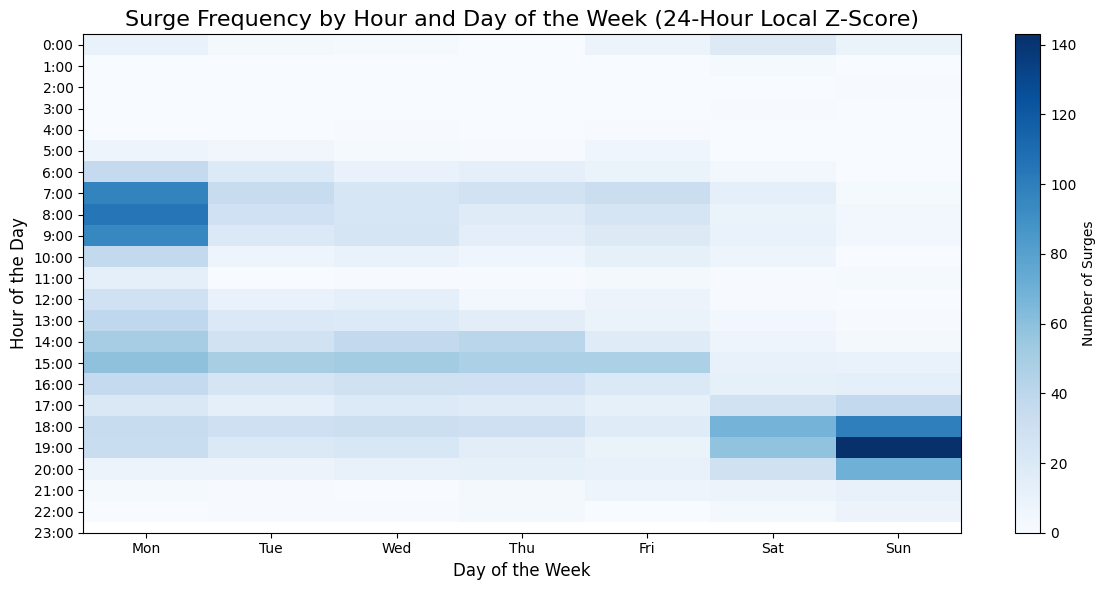

In [ ]:
# Extract day of the week for analysis (Monday = 0, Sunday = 6)
all_data['Day_of_Week'] = all_data['Datetime'].dt.dayofweek

# Group by both the hour of the day and the day of the week to analyze surge patterns
surge_data_24h = all_data[local_z_score_24h_surge].groupby(['Hour', 'Day_of_Week']).size().unstack(fill_value=0)

# Plot heatmap of surge frequency by hour and day of the week
plt.figure(figsize=(12, 6))
plt.imshow(surge_data_24h, aspect='auto', cmap='Blues')

# Adding labels
plt.colorbar(label='Number of Surges')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.yticks(ticks=range(24), labels=[f'{hour}:00' for hour in range(24)])
plt.title('Surge Frequency by Hour and Day of the Week (24-Hour Local Z-Score)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Hour of the Day', fontsize=12)

# Display the heatmap
plt.tight_layout()
plt.show()


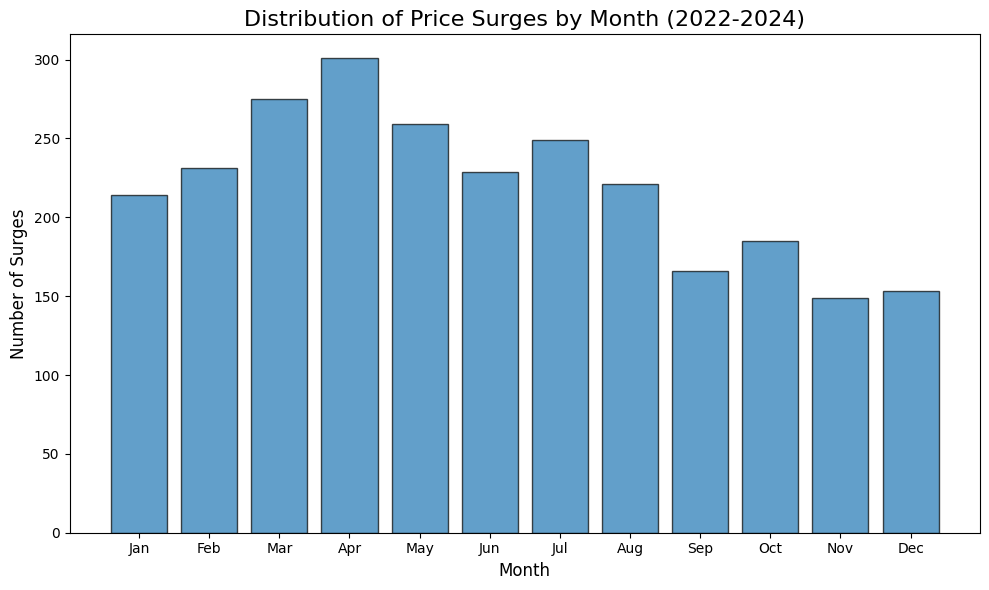

In [ ]:
# Extract the month from the Datetime column for analysis
all_data['Month'] = all_data['Datetime'].dt.month

# Group the surge data by month and count the number of surges in each month
monthly_surge_counts = all_data[local_z_score_24h_surge].groupby('Month').size()

# Plot the surge counts for each month across the year
plt.figure(figsize=(10, 6))
plt.bar(monthly_surge_counts.index, monthly_surge_counts.values, edgecolor='black', alpha=0.7)

# Labels and title
plt.title('Distribution of Price Surges by Month (2022-2024)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Surges', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

# 1. Load and preprocess data (assuming 'all_data' is ready)
all_data['Surge'] = (all_data['local_z_score_24h'] > 2).astype(int)

# 2. Feature Engineering
all_data['Hour'] = all_data['Datetime'].dt.hour
all_data['Day'] = all_data['Datetime'].dt.day
all_data['Month'] = all_data['Datetime'].dt.month
all_data['Day_of_Week'] = all_data['Datetime'].dt.dayofweek

# Lag Features
for lag in range(1, 49):
    all_data[f'USEP_lag_{lag}'] = all_data['USEP (c/kWh)'].shift(lag)

# Rolling Statistics
all_data['Rolling_Mean_24h'] = all_data['USEP (c/kWh)'].rolling(window=48).mean()
all_data['Rolling_Std_24h'] = all_data['USEP (c/kWh)'].rolling(window=48).std()

# Drop NaNs
all_data = all_data.dropna()

# 3. Data Preparation
lag_features = [f'USEP_lag_{lag}' for lag in range(1, 49)]
feature_cols = ['Hour', 'Day', 'Month', 'Day_of_Week'] + lag_features + ['Rolling_Mean_24h', 'Rolling_Std_24h']
X = all_data[feature_cols]
y = all_data['Surge']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Training
model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train_scaled, y_train)

# 5. Evaluation
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 6. Save the Model
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(model, 'surge_model.joblib')


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8758
           1       0.75      0.28      0.40       526

    accuracy                           0.95      9284
   macro avg       0.85      0.64      0.69      9284
weighted avg       0.95      0.95      0.94      9284

Confusion Matrix:
[[8709   49]
 [ 380  146]]
ROC-AUC Score: 0.9579


['surge_model.joblib']

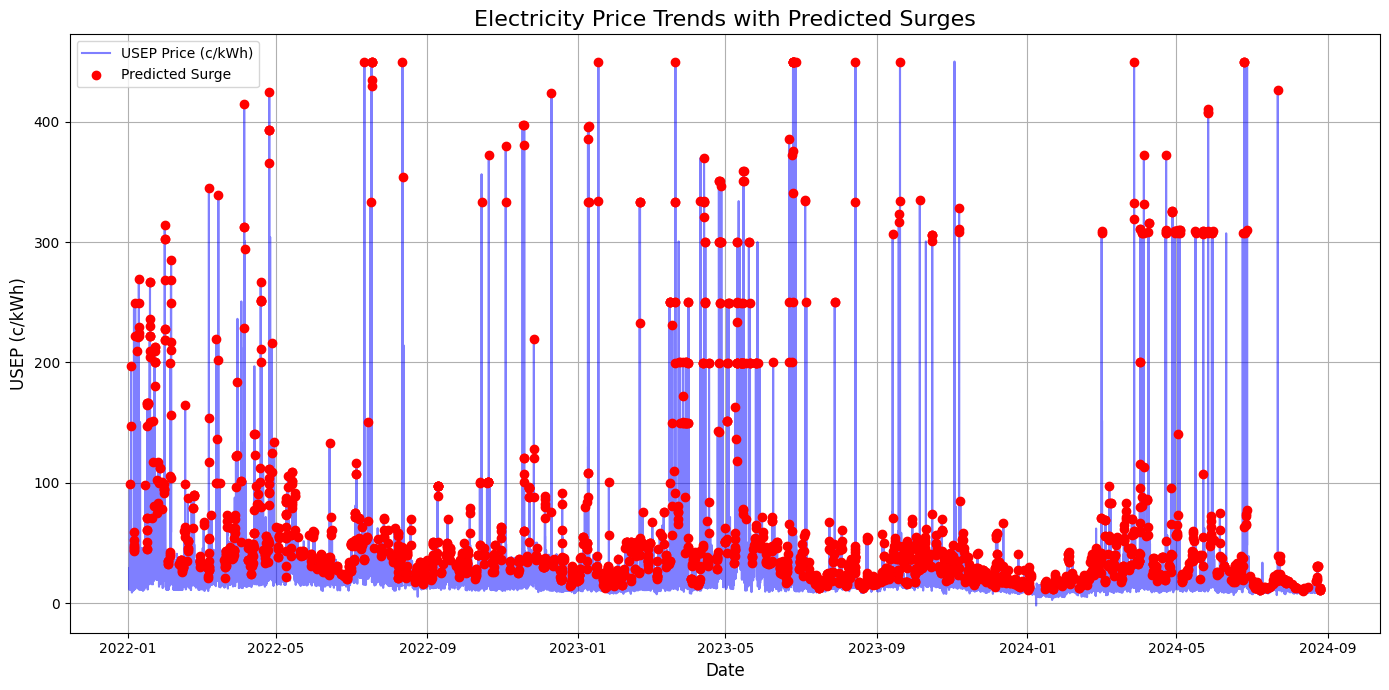

In [ ]:
# First, let's scale the entire dataset using the scaler we fitted earlier on the training set
X_scaled = scaler.transform(X)  # Use the same scaler from the training step

# Make predictions for the entire dataset
all_data['Predicted_Surge'] = model.predict(X_scaled)

# Plot the original electricity price data along with predicted surges
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot the raw USEP prices
plt.plot(all_data['Datetime'], all_data['USEP (c/kWh)'], label='USEP Price (c/kWh)', alpha=0.5, color='blue')

# Highlight periods of predicted surges
predicted_surge = all_data['Predicted_Surge'] == 1
plt.scatter(all_data['Datetime'][predicted_surge], all_data['USEP (c/kWh)'][predicted_surge],
            color='red', label='Predicted Surge', zorder=5)

# Labels and title
plt.title('Electricity Price Trends with Predicted Surges', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('USEP (c/kWh)', fontsize=12)
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()
